# Assignment 3

My part of the assignment 3 is to analyze the connection between border issues and natural resource issues according to the "peace agreement.xlsx" by histogram. 

## Load Data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

data_origin = pd.read_excel("peace agreement.xlsx")
data_origin.head()

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
0,Afghanistan,Government/territory,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,2232,3,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,1
1,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1739,2,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,1,1
2,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1923,2,Agreement between the two campaign teams regar...,2014-09-21,Multiparty signed/agreed,...,0,0,0,0,1,1,0,0,0,1
3,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,864,1,Tokyo Declaration Partnership for Self-Relianc...,2012-07-08,Multiparty signed/agreed,...,0,0,0,1,0,0,0,0,1,1
4,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,848,1,Conclusions of the Conference on Afghanistan a...,2011-12-05,Multiparty signed/agreed,...,0,0,0,1,1,0,0,0,0,1


## Step 1

Our motion is to find out the connection between border and natural resource, so the first step is that to filter out the peace agreements in our dataset refer to conflicts over natural resources.

In the dataset, the variable 'NatRes' takes the value of 1 if the peace agreement includes any mention of natural resources. So we choose 'NatRes'=1 as the condition to select natural resource related rows.

Show the number of natural resources related rows.

In [39]:
data = data_origin.loc[ data_origin['NatRes'] == 1 ]
print(data.shape[0])

217


When filter out the natural resource related agreements, We can draw the picture to show it by country with peace agreement counts.

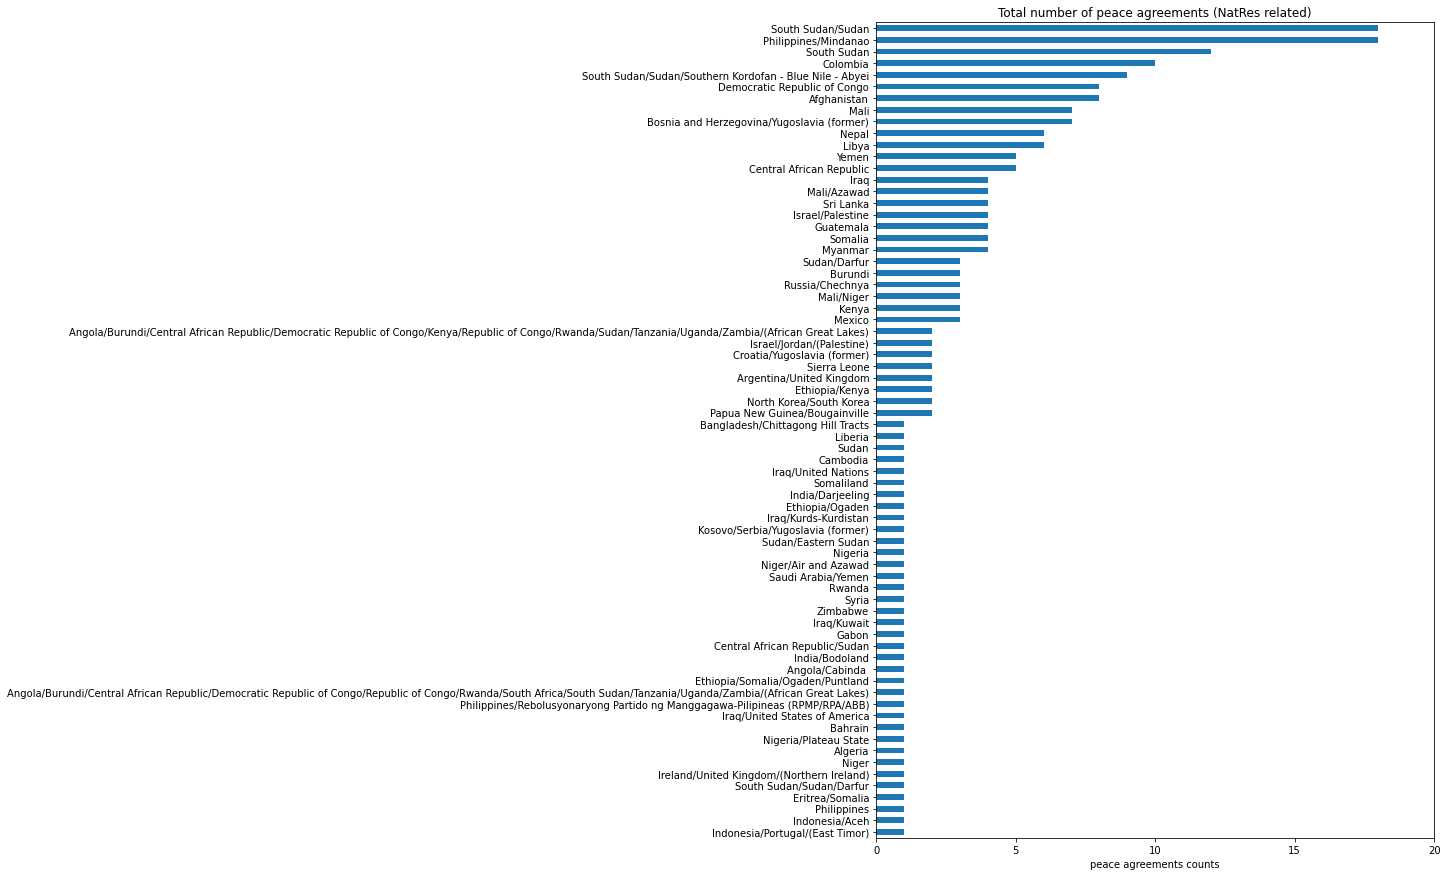

In [40]:
data_country = data.loc[:,'Con'].value_counts().sort_values(ascending = True)

plt.figure(figsize=(10,15))
data_country.plot(kind='barh')

ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(5)) # 设置整数
plt.xlim(0,20)
plt.title('Total number of peace agreements (NatRes related)')
plt.xlabel('peace agreements counts')
plt.show()

## Step 2

From the picture above, we can see that lots of country is in Africa area. With the analysis from assignment 2, we can reduce the area to Africa(excl MENA) that is the most worthwhile area to analyze.

We can see the proportion of the peace agreement counts in Africa(excl MENA) by contrast the country in different area. 

The below result as shown is the number of country counts in origin data.

In [41]:
print(data_country.shape[0])

70


Show the number of country counts in Africa(excl MENA) area.

In [42]:
data_Africa = data.loc[ data['Reg'] == 'Africa (excl MENA)']
data_Africa_country = data_Africa.loc[:,'Con'].value_counts().sort_values(ascending=True)
print(data_Africa_country.shape[0])

33


We can see the result above, Africa(excl MENA) take the half of the country counts which is natural resource related. So we can draw the conclusion that the Africa(excl MENA) is the most worthwhile area to analyze.

Draw the picture of peace agreement counts by country in Africa(excl MENA) as below.

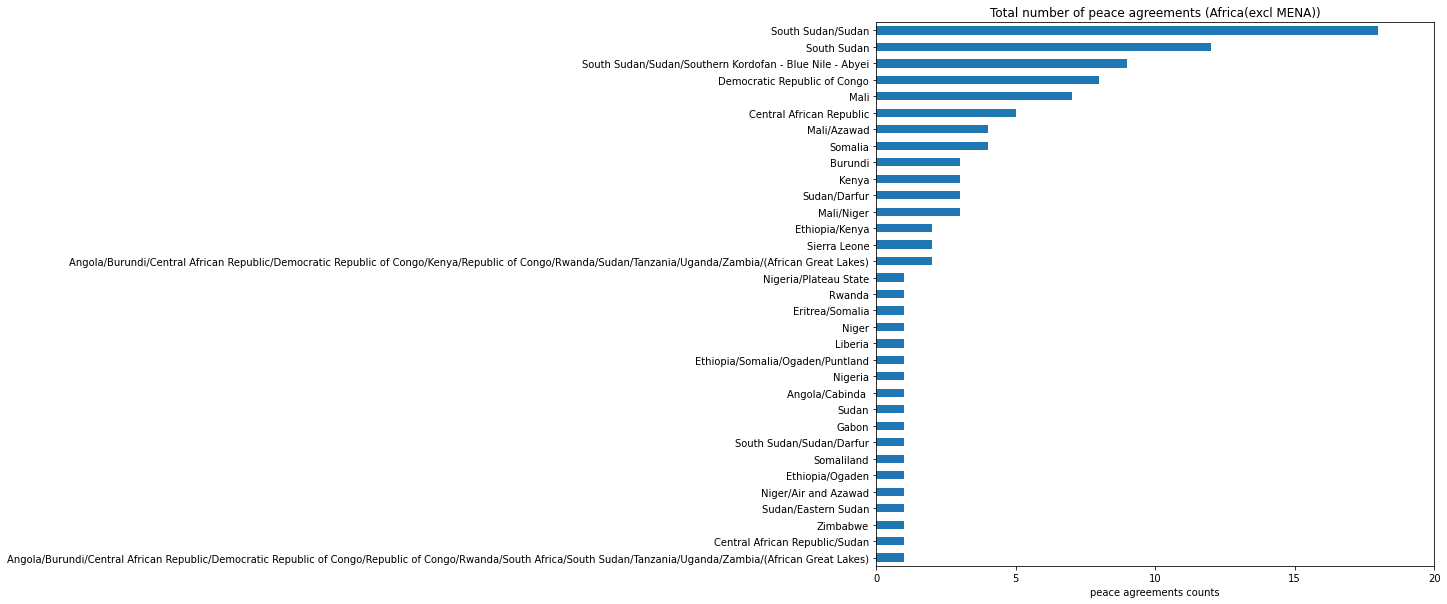

In [43]:
plt.figure(figsize=(10,10))
data_Africa_country.plot(kind='barh')

ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(5)) # 设置整数
plt.xlim(0,20)
plt.title('Total number of peace agreements (Africa(excl MENA))')
plt.xlabel('peace agreements counts')
plt.show()

## Step 3

Because of the max proportion of peace agreements in Africa(excl MENA), maybe we can contrast the difference between origin data and natural resource related data.

Then we count the peace agreements in Africa(excl MENA), in the condition of natural resource related or not.

In [44]:
import copy
data_origin_Africa_country = copy.deepcopy(data_Africa_country)
for index in range(data_Africa_country.shape[0]):
    data_origin_Africa_country[index] = 0

In [45]:
for index, row in data_origin.iterrows():
    if data_origin.loc[index, 'Con'] in data_Africa_country.index:
        data_origin_Africa_country[data_origin.loc[index, 'Con']] = data_origin_Africa_country[data_origin.loc[index, 'Con']] + 1


Sort the data of Africa(excl MENA) and the origin by index, By doing this, it is convenient for us to draw pictures.

In [46]:
data_Africa_country = data_Africa_country.sort_index()

In [47]:
data_origin_Africa_country = data_origin_Africa_country.sort_index()

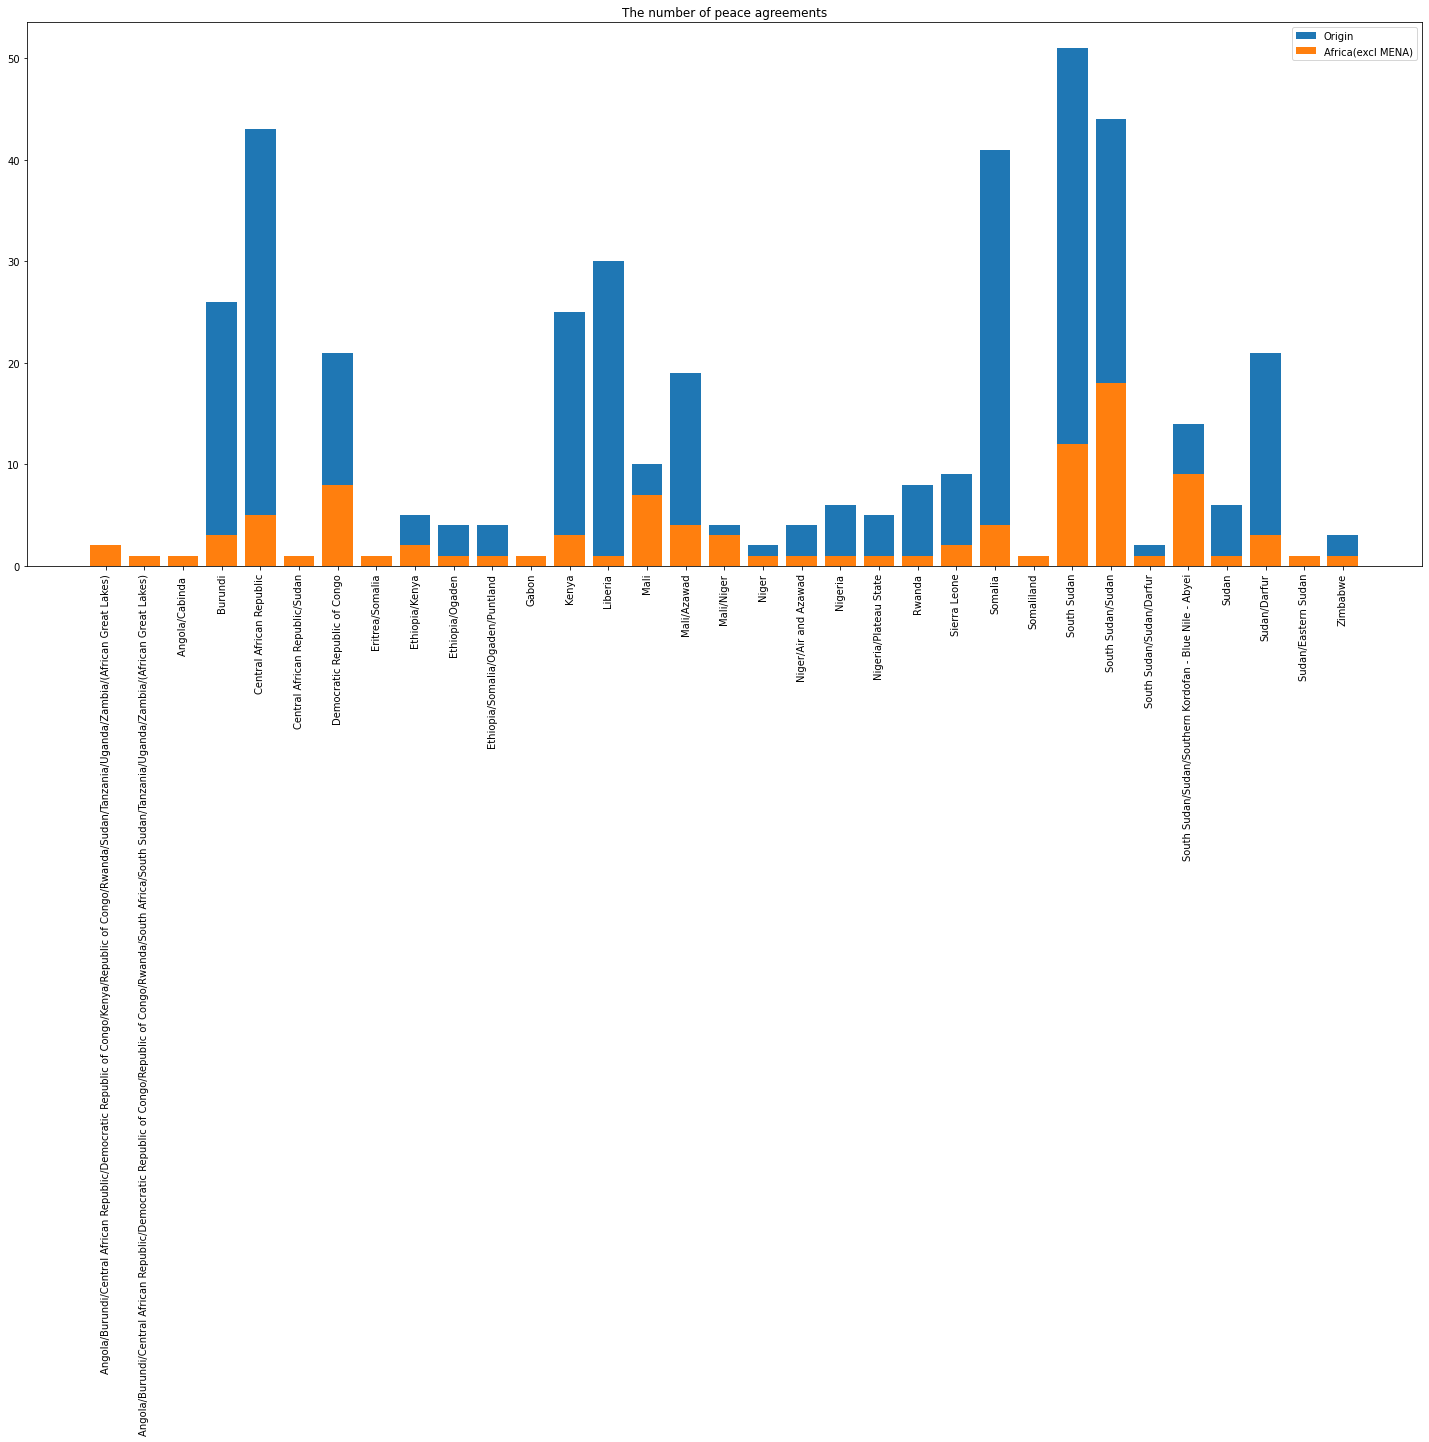

In [48]:
plt.figure(figsize=(25,10))

plt.bar(data_origin_Africa_country.index, data_origin_Africa_country.values,label='Origin')
plt.bar(data_Africa_country.index, data_Africa_country.values, label='Africa(excl MENA)')
plt.title("The number of peace agreements")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

## Step 4

Maybe exist the connection between the border and the natural resource. According to the "PA-X", The variable of 'StBor' and 'StXbor' maybe can present border-related. 

Filter the border & natural resource related peace agreements by country, and sort it by index as same to above origin data. 

In [49]:
data_Africa_border = data_Africa.loc[(data_Africa['StBor'] == 1) | (data_Africa['StXbor'] == 1)]

data_Africa_border_country = copy.deepcopy(data_Africa_country)
for index in range(data_Africa_country.shape[0]):
    data_Africa_border_country[index] = 0

for index, row in data_Africa_border.iterrows():
    if data_Africa_border.loc[index, 'Con'] in data_Africa_country.index:
        data_Africa_border_country[data_Africa_border.loc[index, 'Con']] = data_Africa_border_country[data_Africa_border.loc[index, 'Con']] + 1


data_Africa_border_country = data_Africa_border_country.sort_index()



Draw the picture to show the difference between border related or not with natural resource related data.

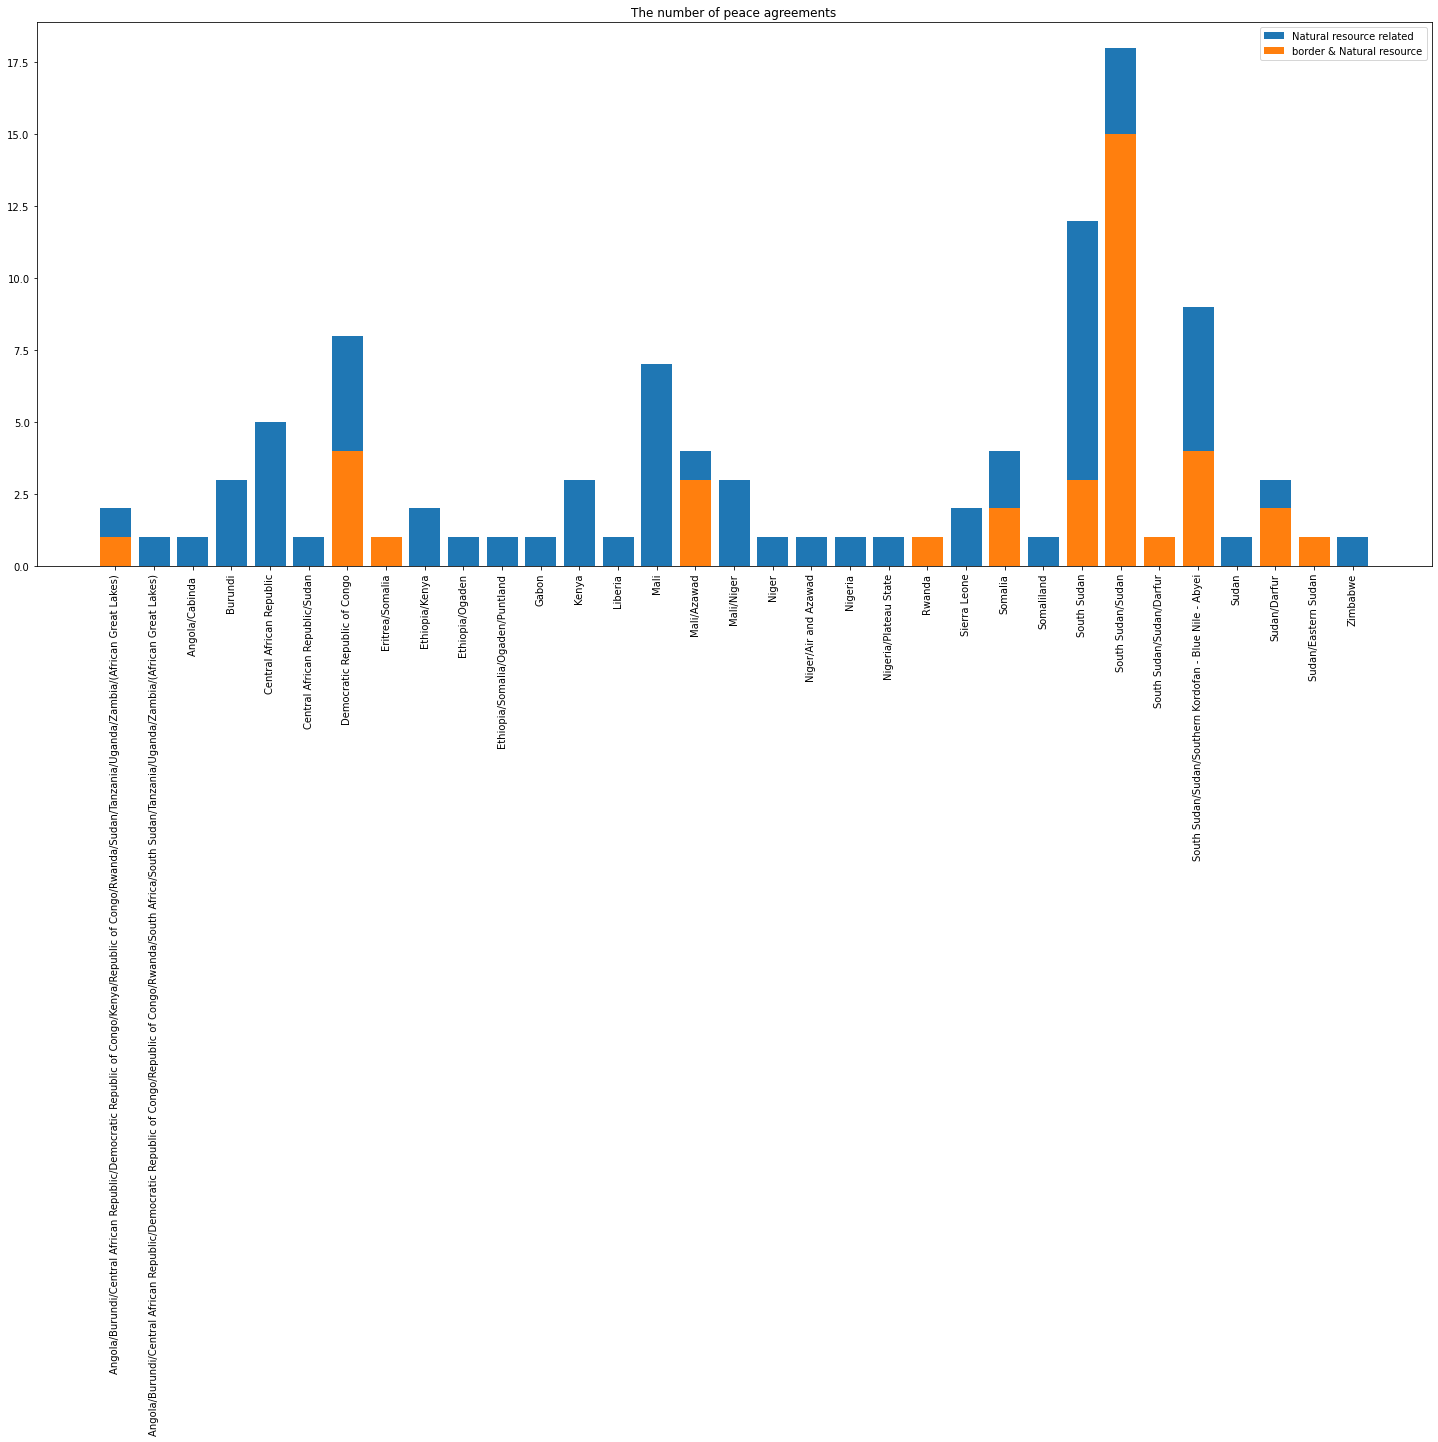

In [50]:
plt.figure(figsize=(25,10))

plt.bar(data_Africa_country.index, data_Africa_country.values,label='Natural resource related')
plt.bar(data_Africa_border_country.index, data_Africa_border_country.values, label='border & Natural resource')
plt.title("The number of peace agreements")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [51]:
data_Africa_country = data_Africa_country.sort_values(ascending=False)
data_Africa_country.head(10)

South Sudan/Sudan                                          18
South Sudan                                                12
South Sudan/Sudan/Southern Kordofan - Blue Nile - Abyei     9
Democratic Republic of Congo                                8
Mali                                                        7
Central African Republic                                    5
Mali/Azawad                                                 4
Somalia                                                     4
Mali/Niger                                                  3
Sudan/Darfur                                                3
Name: Con, dtype: int64

The country which only have 1 or 2 peace agreements maybe have no reference which will be 100% or not. So we choose the top 10 country to analyze, because the number of peace agreements in that is over than 2 with diversity. So we draw the picture like the below.

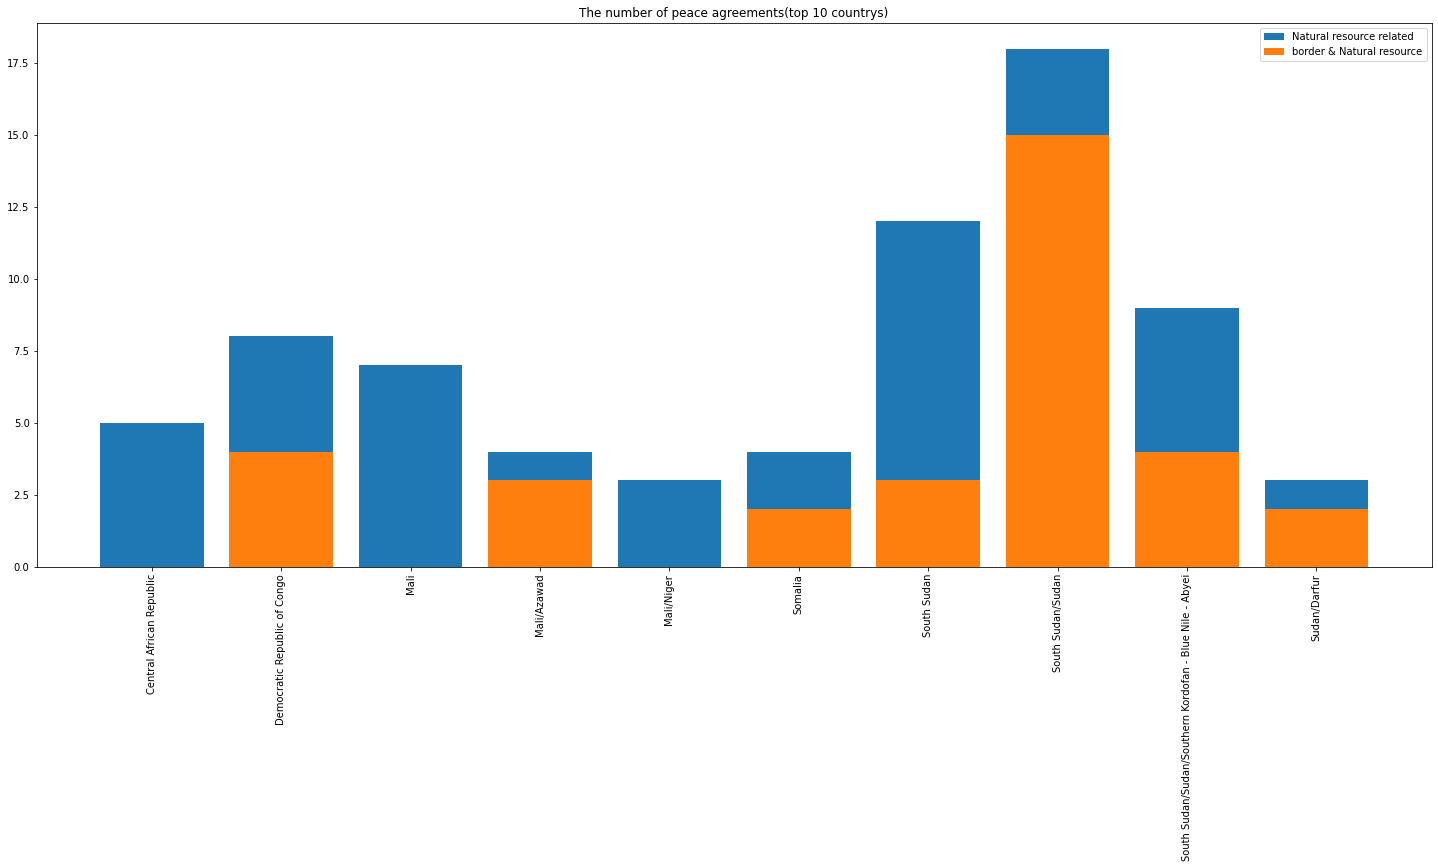

In [52]:
data_Africa_country = data_Africa_country.head(10)

data_Africa_border_country = copy.deepcopy(data_Africa_country)
for index in range(data_Africa_country.shape[0]):
    data_Africa_border_country[index] = 0

for index, row in data_Africa_border.iterrows():
    if data_Africa_border.loc[index, 'Con'] in data_Africa_country.index:
        data_Africa_border_country[data_Africa_border.loc[index, 'Con']] = data_Africa_border_country[data_Africa_border.loc[index, 'Con']] + 1


data_Africa_border_country = data_Africa_border_country.sort_index()
data_Africa_country = data_Africa_country.sort_index()

plt.figure(figsize=(25,10))

plt.bar(data_Africa_country.index, data_Africa_country.values,label='Natural resource related')
plt.bar(data_Africa_border_country.index, data_Africa_border_country.values, label='border & Natural resource')
plt.title("The number of peace agreements(top 10 countrys)")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Now we can see that, if the number of peace agreements is over than 3 and have the diversity, the border related take the very max proportion in natural resource related peace agreements. And more than 70% countrys have the border & natural resource related peace agreements. 